In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('3PtHistoricalResults.csv')
df.head()


,name,made,att,dewmade,dewatt
0,Seth Curry,13,25,NaN,NaN
1,Stephen Curry,173,225,3.0,4.0
2,Buddy Hield,91,125,0.0,8.0
3,Damian Lillard,45,75,3.0,4.0
4,Kyle Korver,14,25,NaN,NaN


In [9]:
df_boxscores = pd.read_csv('Boxscores.csv', index_col=0)
print(df_boxscores.shape)
df_boxscores.head()

(548000, 13)


,FixtureURL,Team,Player,MinutesPlayed,Points,FieldGoals,FieldGoalsAttempted,ThreePointers,ThreePointersAttempted,FreeThrows,FreeThrowsAttempted,OffensiveRebounds,DefensiveRebounds
0,/boxscores/200310280LAL.html,DAL,10,34 days 22:59:59,4,2,5,0,0,0,0,0,3
1,/boxscores/200310280LAL.html,DAL,11,34 days 22:59:59,4,2,2,0,0,0,0,1,0
2,/boxscores/200310280LAL.html,DAL,12,34 days 22:59:59,1,0,0,0,0,1,2,0,0
3,/boxscores/200310280LAL.html,LAL,13,34 days 22:59:59,16,6,14,1,5,3,5,0,3
4,/boxscores/200310280LAL.html,LAL,14,34 days 22:59:59,21,10,20,-500,4,0,0,1,6


In [4]:
df = pd.read_csv('Fixtures.csv')
df.head()

,Unnamed: 0,Season,FixtureKey
0,0,2004.0,NaN
1,1,2004.0,/boxscores/200310280SAS.html
2,2,NaN,/boxscores/200310290BOS.html
3,3,2004.0,/boxscores/200310290CHI.html
4,4,2004.0,/boxscores/200310290DEN.html


In [5]:
df = pd.read_csv('Players.csv')
df.head()

,Unnamed: 0,PlayerID,FirstName,Surname,Height,Weight,DOB
0,0,1,Antoine,Walker,80.0,224,8/12/1976
1,2561,2,Dirk,Nowitzki,84.0,245,6/19/1978
2,1,2,Dirk,Nowitzki,84.0,245,6/19/1978
3,2,3,Michael,Finley,79.0,215,3/6/1973
4,3,4,Steve,Nash,75.0,195,2/7/1974


In [6]:
df = pd.read_csv('Participants.csv')
df.head()

,Unnamed: 0,PlayerName
0,0,Tyrese Haliburton
1,1,Malik Beasley
2,2,Jalen Brunson
3,3,Lauri Markkanen
4,4,Damian Lillard


In [10]:
# We can see negative three pointers as well as 'high' values that seem unreasonable.
# e.g. a player is very unlikely to have made -500 3 pointers
df_boxscores.describe()

,Player,Points,FieldGoals,FieldGoalsAttempted,ThreePointers,ThreePointersAttempted,FreeThrows,FreeThrowsAttempted,OffensiveRebounds,DefensiveRebounds
count,548000.000000,548000.000000,548000.000000,548000.000000,548000.000000,548000.000000,548000.000000,548000.000000,548000.00000,548000.000000
mean,818.764239,9.907447,3.674843,8.045805,0.815675,2.281447,1.742082,2.286493,1.03752,3.075945
std,564.931206,8.270016,3.095062,5.793553,1.582787,2.641138,2.380647,2.911524,1.41169,2.719647
min,-1.000000,0.000000,0.000000,0.000000,-500.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,342.000000,3.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
50%,774.000000,8.000000,3.000000,7.000000,0.000000,1.000000,1.000000,2.000000,1.00000,2.000000
75%,1188.000000,15.000000,5.000000,12.000000,1.000000,4.000000,3.000000,4.000000,2.00000,4.000000
max,2535.000000,81.000000,28.000000,50.000000,500.000000,24.000000,26.000000,39.000000,18.00000,25.000000


In [11]:
# Filter rows where made 3-pointers exceed attempted (impossible in basketball) 
# 1. Create boolean mask: True when 'ThreePointers' > 'ThreePointersAttempted'
# 2. Apply mask to df_boxscores to get questionable rows
# 3. Select only the relevant columns for inspection
print(df_boxscores[df_boxscores['ThreePointers'] > df_boxscores['ThreePointersAttempted']]
      [['ThreePointers', 'ThreePointersAttempted']])

        ThreePointers  ThreePointersAttempted
16                500                       0
352754              6                       1


In [12]:
# get rid of those rows
df_boxscores = df_boxscores.drop([16, 352754])
print(df_boxscores.shape)

(547998, 13)


In [17]:
# having an unrealistic number of 3 pointers attempted (e.g. 1000 or -10). Look at negative values first.
print(df_boxscores[df_boxscores['ThreePointers'] < 0][['ThreePointers']])
print(df_boxscores[df_boxscores['ThreePointersAttempted'] < 0][['ThreePointersAttempted']])

Empty DataFrame
Columns: [ThreePointers]
Index: []
Empty DataFrame
Columns: [ThreePointersAttempted]
Index: []


In [15]:
# get rid of those rows
df_boxscores = df_boxscores.drop([4])
print(df_boxscores.shape)

(547997, 13)


              Player         Points     FieldGoals  FieldGoalsAttempted  \
count  547997.000000  547997.000000  547997.000000        547997.000000   
mean      818.766765       9.907414       3.674827             8.045781   
std       564.930549       8.269982       3.095043             5.793524   
min        -1.000000       0.000000       0.000000             0.000000   
25%       342.000000       3.000000       1.000000             4.000000   
50%       774.000000       8.000000       3.000000             7.000000   
75%      1188.000000      15.000000       5.000000            12.000000   
max      2535.000000      81.000000      28.000000            50.000000   

       ThreePointers  ThreePointersAttempted     FreeThrows  \
count  547997.000000           547997.000000  547997.000000   
mean        0.815669                2.281450       1.742090   
std         1.262047                2.641142       2.380651   
min         0.000000                0.000000       0.000000   
25%      

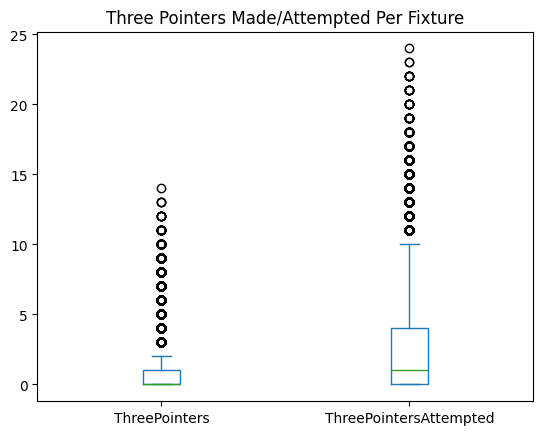

In [20]:
# Look at other outliers
print(df_boxscores.describe())

# These 'outliers' all look reasonable, so no need to get rid of any of the rows
ax = df_boxscores[['ThreePointers', 'ThreePointersAttempted']].plot(kind='box', title='Three Pointers Made/Attempted Per Fixture')
plt.show()